In [ ]:
def compute_base_b_set(U_hat:np.ndarray,ϕ_mtx:np.ndarray)->np.ndarray:

    # creates a (n_tr x n_tr) matrix
    try:
        base_b_mtx = ϕ_mtx @ np.linalg.inv(U_hat) @ ϕ_mtx.T
    except:
        base_b_mtx = ϕ_mtx @ np.linalg.pinv(U_hat) @ ϕ_mtx.T

    # sum over the columns to reduce to (n_tr x 1) vector
    return np.sum(base_b_mtx,axis=1) # this was the case prviously in pool_alice_code

In [ ]:
dummy1 = np.load('./archive/base_b_set_debug_v2.npy')
dummy2 = np.load('./archive/base_b_set_debug.npy')

for i in range(0,len(dummy1)):
    print(dummy1[i],dummy2[i])

    if i > 3:
        break

In [ ]:
dummy = np.load('base_b_set_debug_v2.npy')

for i in [i for i in np.arange(0,1.1,0.1)] + [i for i in np.arange(0.40,0.61,0.01)]:
    try: 
        assert np.all((np.greater(dummy,0))), "base_b_set[i] > 0 is NOT true for all i (i.e. for every sample)"
    except:
        print('failed! some are negative')

In [11]:
import pool_alice_code
import os, copy, sys
import numpy as np
import pandas as pd
from typing import List, Tuple
import matplotlib.pyplot as plt

In [22]:
# Run this cell to reset any change in pool_alice_code
sys_modules_list = list(sys.modules)
for module_name in sys_modules_list:
    if module_name == "pool_alice_code":
        sys.modules.pop("pool_alice_code")
        import pool_alice_code

## Load data

In [2]:
os.getcwd()

'/home/ethan/02750-automation/automation_final_project/P_ALICE'

In [3]:
X: np.ndarray = np.load('../data/abalone_age/X.npy')
y: np.ndarray  = np.load('../data/abalone_age/y.npy')
columns='Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight'.split(',')
X_df = pd.DataFrame(X,columns=columns)
num_original_features = len(X[0])

# constants

In [4]:
SEEDS = [i*1001 for i in range(1,6)]

SEEDS

[1001, 2002, 3003, 4004, 5005]

In [5]:
BATCH_SIZE = 16

# P-ALICE, linear regression

In [5]:
X_pool_linear = np.vstack((X.T,np.ones(len(X)))).T
X_pool_linear

array([[0.    , 0.455 , 0.365 , ..., 0.101 , 0.15  , 1.    ],
       [0.    , 0.35  , 0.265 , ..., 0.0485, 0.07  , 1.    ],
       [1.    , 0.53  , 0.42  , ..., 0.1415, 0.21  , 1.    ],
       ...,
       [0.    , 0.6   , 0.475 , ..., 0.2875, 0.308 , 1.    ],
       [1.    , 0.625 , 0.485 , ..., 0.261 , 0.296 , 1.    ],
       [0.    , 0.71  , 0.555 , ..., 0.3765, 0.495 , 1.    ]])

In [36]:
num_features_linear = len(X_pool_linear[0])
basis_funcs_linear: List[np.ufunc] = [pool_alice_code.identity_basis for _ in range(num_features_linear)] # type: ignore
try:
    abalone_age_palice_linear_16: np.ndarray = np.load('../results/abalone_age_palice_linear_16.npy')
    print("RESULTS ALREADY OBTAINED")
except:
    abalone_age_palice_linear_16 = pool_alice_code.simulate_pool_alice_n_times(n=len(SEEDS),seeds=SEEDS,X_pool=X_pool_linear,y_pool=y,basis_funcs=basis_funcs_linear,batch_size=BATCH_SIZE)
    np.save('../results/abalone_age_palice_linear_16.npy', abalone_age_palice_linear_16)



______________________________________________
simulation number=1, prng_seed=1001,start_time=1713563359.383003
percentage complete: 20.0
percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 17.496039867401123 seconds

______________________________________________
simulation number=2, prng_seed=2002,start_time=1713563376.88274
percentage complete: 20.0
percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 18.484652996063232 seconds

______________________________________________
simulation number=3, prng_seed=3003,start_time=1713563395.3711457
percentage complete: 20.0
percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 18.6174578666687 se

# passive (random) learning, linear regression

In [37]:
try:
    abalone_age_random_linear_16: np.ndarray = np.load('../results/abalone_age_random_linear_16.npy')
    print("RESULTS ALREADY OBTAINED")
except:
    abalone_age_random_linear_16 = pool_alice_code.simulate_pool_alice_n_times(n=len(SEEDS),seeds=SEEDS,X_pool=X_pool_linear,y_pool=y,basis_funcs=basis_funcs_linear,passive_learning=True,batch_size=BATCH_SIZE)
    
    np.save('../results/abalone_age_random_linear_16.npy', abalone_age_random_linear_16)


______________________________________________
simulation number=1, prng_seed=1001,start_time=1713563447.8207881
percentage complete: 20.0


percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 2.6148171424865723 seconds

______________________________________________
simulation number=2, prng_seed=2002,start_time=1713563450.4375787
percentage complete: 20.0
percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 2.554462432861328 seconds

______________________________________________
simulation number=3, prng_seed=3003,start_time=1713563452.9946465
percentage complete: 20.0
percentage complete: 25.0
percentage complete: 30.0
percentage complete: 35.0
percentage complete: 40.0
percentage complete: 45.0
percentage complete: 50.0
Elapsed Time: 2.633676052093506 seconds

______________________________________________
simulation number=4, prng_seed=4004,start_time=1713563455.6304955
percentage comple

# summarize linear results in plot

In [38]:
x_train_length = len(X)*0.8
twenty_percent = int(x_train_length * 0.20)
fifty_percent = int(x_train_length * 0.5)
num_samples_axis = range(twenty_percent,fifty_percent+1,BATCH_SIZE)

In [39]:
print(len(num_samples_axis))
print(len(list(num_samples_axis[::2])))
abalone_age_random_linear_16.shape

63
32


(5, 63)

In [40]:
abalone_age_random_linear_16[:,::2].shape

(5, 32)

In [41]:
try:
    np.load('../results/abalone_age_random_linear_32.npy')
except:
    np.save('../results/abalone_age_palice_linear_32.npy',abalone_age_palice_linear_16[:,::2])
    np.save('../results/abalone_age_random_linear_32.npy',abalone_age_random_linear_16[:,::2])

In [18]:
num_sims_to_use = 5

means_1_active = np.mean(abalone_age_palice_linear_16[::num_sims_to_use],axis=0)
means_1_passive = np.mean(abalone_age_random_linear_16[::num_sims_to_use],axis=0)

stds_1_active = np.std(abalone_age_palice_linear_16[::num_sims_to_use],axis=0)
stds_1_passive = np.std(abalone_age_random_linear_16[::num_sims_to_use],axis=0)

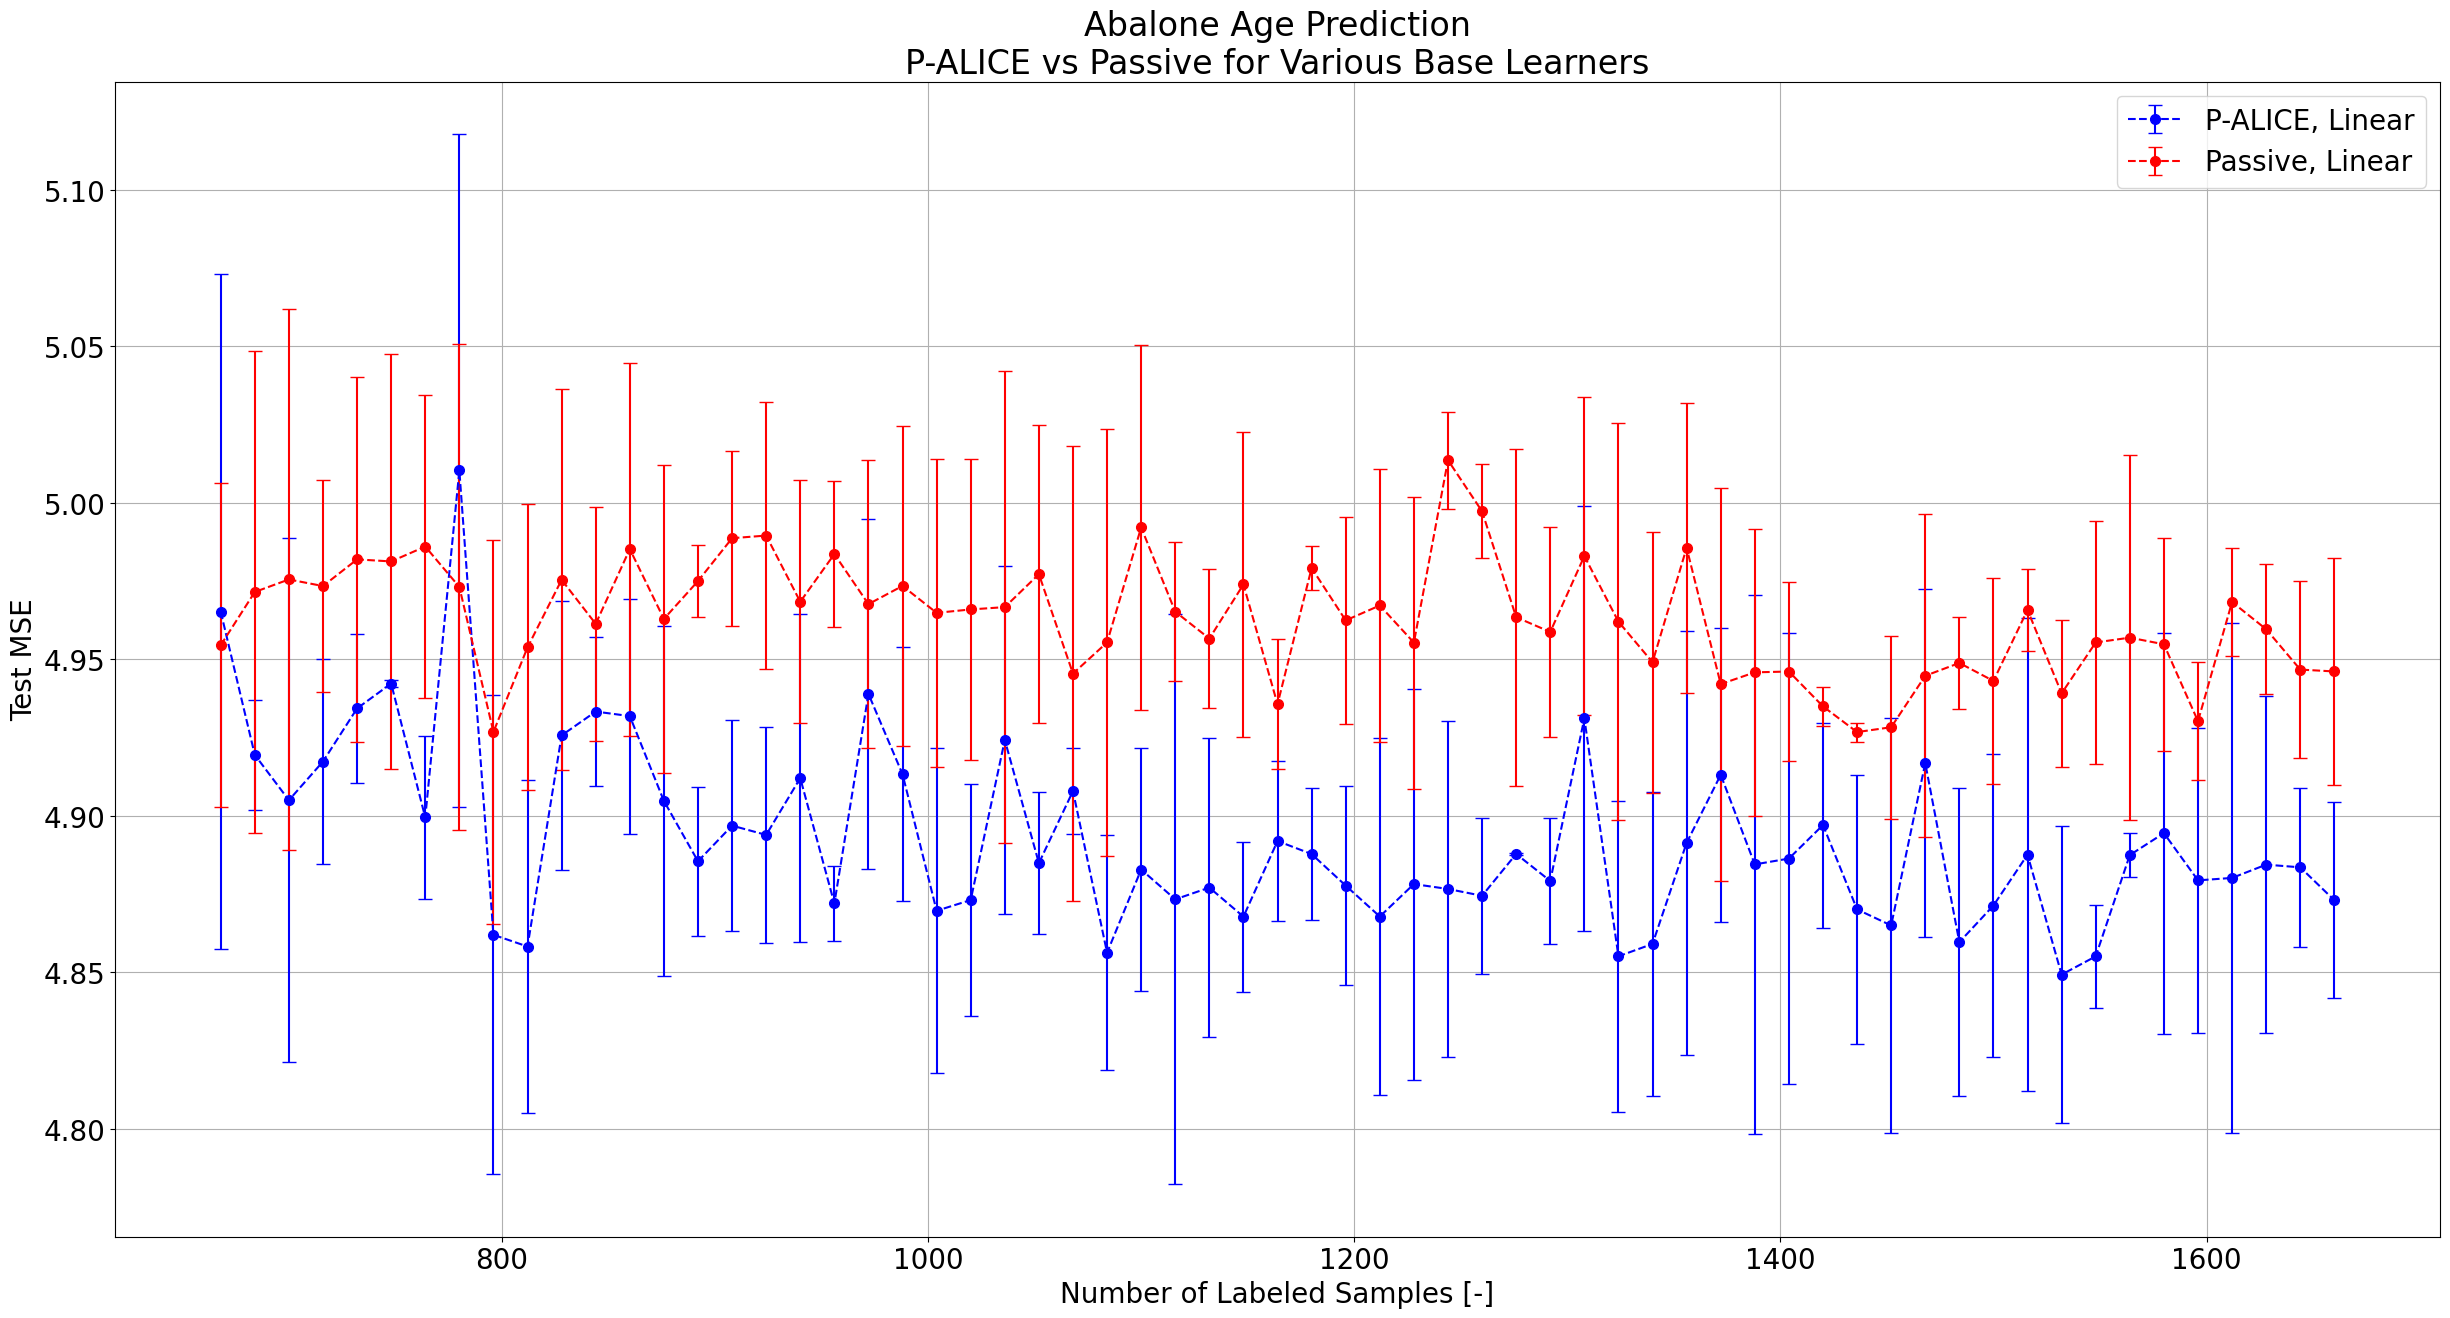

In [19]:
stepsize = 1
# using rc_context to change font size temporarily
with plt.rc_context({'font.size': 20}):
    plt.figure(figsize=(30,15)) 
    # plot scatter plots with error bars
    plt.errorbar(x=num_samples_axis[::stepsize],y=means_1_active[::stepsize], yerr=stds_1_active[::stepsize], fmt='o--', color='b', ecolor='b', capsize=5, markersize=7, label='P-ALICE, Linear')
    plt.errorbar(x=num_samples_axis[::stepsize],y=means_1_passive[::stepsize], yerr=stds_1_passive[::stepsize], fmt='o--', color='r', ecolor='r', capsize=5, markersize=7, label='Passive, Linear')

    # customize plot
    plt.xlabel('Number of Labeled Samples [-]')
    # plt.xticks(x, x)
    plt.ylabel('Test MSE')
    plt.legend()
    plt.title('Abalone Age Prediction\nP-ALICE vs Passive for Various Base Learners')
    plt.grid(True)
plt.show()

# P-ALICE, nonlinear regression 1

In [6]:
basis_funcs_nonlinear_1 = []
X_pretransformation_nonlinear_1 = copy.deepcopy(X_df)

for i in range(num_original_features):
    basis_funcs_nonlinear_1.append(pool_alice_code.identity_basis)

for i in range(num_original_features):
    feature_i_name = X_df.columns[i]

    # add squared feature
    feature_i_name_squared = feature_i_name + '_squared'
    X_pretransformation_nonlinear_1[feature_i_name_squared] = X_df[feature_i_name]
    basis_funcs_nonlinear_1.append(pool_alice_code.squared_basis)

    # add cubed feature
    feature_i_name_cubed = feature_i_name + '_cubed'
    X_pretransformation_nonlinear_1[feature_i_name_cubed] = X_df[feature_i_name]
    basis_funcs_nonlinear_1.append(pool_alice_code.cubed_basis)

    # add first order interactions
    for j in range(i,num_original_features): # ranging from i to num_original_features prevents X1*X2 and X2*X1
        feature_j_name = X_df.columns[j]
        if i != j:
            interaction_name = feature_i_name + '_' + feature_j_name
            X_pretransformation_nonlinear_1[interaction_name] = X_df[feature_i_name] + X_df[feature_j_name]
            basis_funcs_nonlinear_1.append(pool_alice_code.identity_basis)


In [7]:
X_pretransformation_nonlinear_1.shape

(4177, 52)

In [8]:
# add a column of 1s for the y-intercept, and add identity basis for this column
X_pool_nonlinear_1 = np.vstack((X_pretransformation_nonlinear_1.T,np.ones(len(X_pretransformation_nonlinear_1)))).T
num_features_nonlinear_1 = len(X_pool_nonlinear_1[0])
basis_funcs_nonlinear_1.append(pool_alice_code.identity_basis)
print(len(basis_funcs_nonlinear_1))
X_pool_nonlinear_1.shape

53


(4177, 53)

In [23]:
try:
    abalone_age_palice_nonlinear_16: np.ndarray = np.load('../results/abalone_age_palice_nonlinear_16.npy')
    print("RESULTS ALREADY OBTAINED")
except:
    abalone_age_palice_nonlinear_16 = pool_alice_code.simulate_pool_alice_n_times(n=len(SEEDS),seeds=SEEDS,X_pool=X_pool_nonlinear_1,y_pool=y,basis_funcs=basis_funcs_nonlinear_1,batch_size=BATCH_SIZE)
    np.save('../results/abalone_age_palice_nonlinear_16.npy', abalone_age_palice_nonlinear_16)



______________________________________________
simulation number=1, prng_seed=1001,start_time=1713567083.0777295
percentage complete: 20.0
λ_val=0.0
λ_val=0.1


/home/ethan/02750-automation/automation_final_project/P_ALICE/pool_alice_code.py:116: RuntimeWarning: invalid value encountered in power
  return base_b_set**λ_val


ValueError: probabilities contain NaN

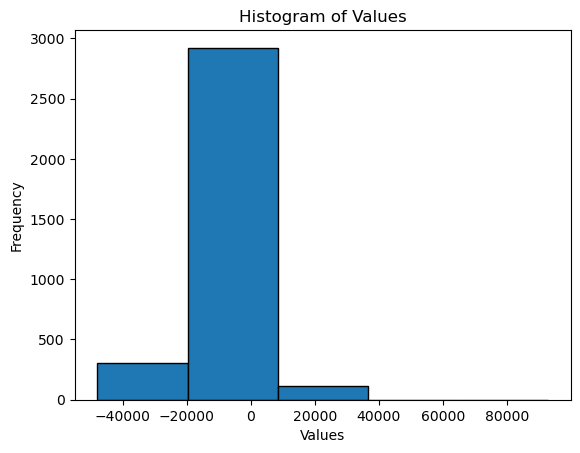

In [21]:
base_b_set_debug = np.load('base_b_set_debug.npy')
plt.hist(base_b_set_debug, bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()


In [24]:
base_b_set_debug ** 0.1

/tmp/ipykernel_28761/3408555050.py:1: RuntimeWarning: invalid value encountered in power
  base_b_set_debug ** 0.1


array([       nan,        nan,        nan, ..., 2.20645389,        nan,
              nan])

In [26]:
base_b_set_debug[0] ** 0.1

/tmp/ipykernel_28761/2703734847.py:1: RuntimeWarning: invalid value encountered in scalar power
  base_b_set_debug[0] ** 0.1


nan

In [27]:
base_b_set_debug[0]

-40011.71826012572

In [28]:
float(base_b_set_debug[0])**0.1

(2.744258675034387+0.8916636950766909j)

In [62]:
test_power = 0.1

# (np.power(base_b_set_debug, test_power, dtype=complex)**(1/test_power)).astype(np.float128)
# (np.power(base_b_set_debug, test_power, dtype=complex))**(1/test_power)
(np.power(np.abs(base_b_set_debug), test_power))

array([2.88548433, 2.64577226, 2.42092945, ..., 2.20645389, 2.63528461,
       2.40316801])

In [56]:
[float(thing)**test_power for thing in base_b_set_debug]

[(1.2248261701332729e-14+200.02929350504073j),
 (7.938585938456421e-15+129.64694708684289j),
 (5.0920367169422785e-15+83.15927041964349j),
 55.265910338407515,
 (6.952615931853982e-15+113.54483491394684j),
 (5.9985760640659316e-15+97.96418148060933j),
 (7.131898852283285e-15+116.47274719941767j),
 (6.013608005910183e-15+98.20967172081112j),
 (2.7983030333507285e-15+45.69975662042339j),
 (6.279093143204293e-16+10.254537304267716j),
 (5.935750476420337e-15+96.93816177126398j),
 (5.559824119961734e-15+90.79881846476388j),
 61.74552895565299,
 (8.539195956056e-15+139.45565304218852j),
 (5.4595784718239385e-15+89.16168279090934j),
 56.484575120855276,
 (6.05692787711423e-15+98.917138906194j),
 (4.278941536259986e-15+69.88041840699132j),
 68.88858158457914,
 58.837471705834446,
 (1.0535853332876916e-14+172.06354256937408j),
 23.14846890154851,
 (7.539278869431819e-15+123.12576776717923j),
 (8.70991467660152e-15+142.24370132948866j),
 96.86027969051756,
 54.38689900827572,
 95.55334471065457,

In [ ]:
base_b_set_debug_v2 = np.load('base_b_set_debug_v2.npy') # base_b generated under version 2
base_b_set_debug = np.load('base_b_set_debug.npy') # base_b generated under version 1
np.allclose(base_b_set_debug_v2,base_b_set_debug) # FALSE!